# Measuring The Effect of Forces in Terms of Directional Preferences between Spiral Tips that annihilate
Tim Tyree<br>
6.16.2021

- DONE: generate spiral data at dt=0.1 for Luo-Rudy model
- TODO: compare angular distributions found for Luo-Rudy model to Fenton-Karma model.

snapshot of comoving frame of spiral tip
- TODO(later): compute xy coordinates of V field rotated such that the y=0,x>0 axis corresponds to the direction of the activation front.
- TODO: plot the snapshot for a right/left handed spiral tip
- TODO: repeat plot the snapshot for a right/left handed spiral tip for small distance between spiral tips
- TODO: visualize streamplot of grad-voltage (or dVdt) for a small number of frames before birth/death.

In [3]:
from lib.my_initialization import *
# from lib.controller.controller_LR import get_one_step_explicit_synchronous_splitting
# from lib.utils import load_buffer
# from lib.routines.return_min_distance import *
# from lib.viewer.DomainPlot import ShowDomain
# from lib.measure.comp_tips_safely import *
from lib import *

#my_initialization.py
import pandas as pd, numpy as np, matplotlib.pyplot as plt

#load the libraries
# from .utils.operari import *
#automate the boring stuff
# from IPython import utils
import time, os, sys, re
import dask.bag as db
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()

#magic    
%autocall 1
%load_ext autoreload
%autoreload 2

darkmode=False
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

Automatic calling is: Smart


In [7]:
#LR results for DT = 0.5 ms
#annihilations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
#creations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/creations_minr_1.0_mindur_20.0.csv"

#FK results for DT = 0.4 ms
#annihilations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
#creations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"

#particle results for DT=0.25ms
input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/annihilations_minr_1_mindur_20.csv"
#creations aggregated
# input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/creations_minr_1_mindur_20.csv"

### notae malorum

In [3]:
# #DONE: finding where I already dev'd using both types of ~comp_tips methods
# #TODO(later): fix get_comp_tips using test based dev in a pycuda interface
# comp_tips=get_comp_tips(width,height,V_threshold)
# dict_tips=comp_tips(img,img_prev,dimgdt, t, txt)
#TODO: generate a 2 frames of clean data using both types of ~comp_tips methods (requires finding where I already do this... but it will give local reproducibility...)
#TODO: compute displacement between all particles in both frames
#TODO: compute apparent displacement of all particles between frames
#TODO: compute sum of forces predicted by the force-types I've been using.
#TODO: compute nearest-neighbor forces predicted by the force-types I've been using.

#TODO: for each of the 6 force models, compute the angular difference between the predicted force direction and the actual displacement
#TODO: plot this tiny sample of apparent displacement versus length of the sum of forces

#TODO: extend a list using ^those x_values,y_values
#TODO: plot apparent displacement versus length of the sum of forces

In [4]:
# get_comp_tips

In [5]:
#TODO: DEBUG GET_COMP_TIPS / DEV GET_COMP_TIPS on macbook
#TODO: link  up png saving from the movie making ipynb

#TODO: alternatively, make a (frameno,width,height,chnlno) numpy array and save as npz.  refine with implicite midpoint rule, and identify all death events according to lagged spiral tip locations

#TODO: access cuda accelerated shared memory from python using pycuda.



__step 2 (python)__ analyze the timescale (and lengthscale) overwhich the significance of directionality arises as two spiral tips collide

__step 1 (python)__ functionally load existing trajectories and compute annihilation events using my preexisting python code
<!-- __step 1 (python)__ functionally compute annihilation trajectories using my preexisting python code -->

__TODO(later):__ modify existing generate_tip_log that uses gpu acceleration 
- to use lagged tip locations
OR
- to use lagged tip locations at a low time resolution
- and then save individual annihilation events at a high time resolution

# visualizing the timescale/lengthscale of significantly inward directed motion in the time leading up to annihilation

In [4]:
df=pd.read_csv(input_fn)
df.sort_values('tdeath',ascending=True,inplace=True)
df.head()

,pid,pid_deathmate,tdeath,r,theta
1050848,5,3,0.25,0.103438,2.437648
323823,11,4,0.25,0.143089,2.609108
48694,2,15,0.25,0.122274,0.157501
556234,3,11,0.25,0.145809,2.062010
324831,10,2,0.25,0.019500,0.418312


In [5]:
#plot the mean drdt versus r
#compute xy values
x_label='r (cm)'
y_label='dr/dt (cm/ms)'

df_phases=df.copy()
t_values=sorted(set(df_phases.tdeath.values))
DT=sorted(set(df_phases.tdeath.values))[0]
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
# dfm=df_phases.groupby('tbirth').mean()
# dfs=df_phases.groupby('tbirth').std()
dfm=df_phases.groupby('tdeath').mean()
dfs=df_phases.groupby('tdeath').std()
t_values=dfm.index.values
range_values=dfm.r.values
drdt_values=np.diff(range_values)/DT
r_values=range_values[1:]/2+range_values[:-1]/2
x_values=r_values
y_values=drdt_values
# yerr_values_lr=dfs.theta.values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
rmax=1.2 #cm
boo=r_values<rmax
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values

dict_force_fit=dict_force_fit
y_hat_values=y_hat_values

In [6]:
nobs=df.groupby('tdeath').r.count().iloc[0]
print(f"nobs={nobs}")
print(f"the best fits are\n {dict_force_fit}.")

nobs=682
the best fits are
 {'m': 0.014799309940152978, 'Delta_m': 0.001102923258292748, 'b': 0.0019184372183000606, 'Delta_b': 0.002092005856845377, 'Rsquared': 0.8036149792908999}.


In [8]:
def print_dict(input_dict):
    for key in input_dict.keys():
        print(f"{key}={input_dict[key]}")

input_fn: /Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/annihilations_minr_1_mindur_20.csv
nobs=682
the best fits are
 {'m': 0.014799309940152978, 'Delta_m': 0.001102923258292748, 'b': 0.0019184372183000606, 'Delta_b': 0.002092005856845377, 'Rsquared': 0.8036149792908999}.


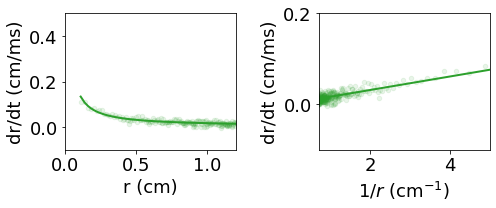

In [10]:
fontsize=18
alpha=0.1

fig,axs=plt.subplots(ncols=2,figsize=(7,3))#(5,4))
ax=axs[0]
ax.scatter(x_values,y_values,c='C2',s=20,alpha=alpha)

#plot fits
ax.plot(x_values,y_hat_values,c='C2',lw=2,alpha=1)

ax.set_xlim([0,1.2])
ax.set_ylim([-0.1,.5])
ax.set_xlabel(x_label,fontsize=fontsize)
ax.set_ylabel(y_label,fontsize=fontsize)
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)

ax=axs[1]
ax.scatter(1/x_values,y_values,c='C2',s=20,alpha=alpha)

#plot fits
ax.plot(1/x_values,y_hat_values,c='C2',lw=2,alpha=1)

# y_hat_values_fk
# y_hat_values_fk

ax.set_xlim([.7,5])
ax.set_ylim([-0.1,.2])
ax.set_xlabel(r'$1/r$ (cm$^{-1}$)',fontsize=fontsize)
ax.set_ylabel(y_label,fontsize=fontsize)

# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)
#wrong bluf because aggregate
plt.tight_layout()
print(f"input_fn: {input_fn}")
print(f"nobs={nobs}")
print(f"the best fits are\n {dict_force_fit}.")
plt.show()

# TODO: quick and dirty angular histogram of many angles for a given time/range before death
then, angular plots over many values
- TODO: overlay several times/ranges to show timescale/engthscale of orientation
- TODO: filter by min_duration and by min_range simultaneously
- TODO: compute the mean_unsigned_angle_between versus t_death_values. 

then, visualizations
- TODO: plot the mean_unsigned_angle_between versus t_death_values. 
    - overlay with background of many individual events / standard deviation
- TODO: plot the range_values versus t_death_values. 
    - overlay with background of many individual events / standard deviation
- TODO: plot the range_values versus mean_unsigned_angle_between. 
    - overlay with background of many individual events / standard deviation

# visualize angular histograms for a given model

## Luo-Rudy

In [25]:
#LR results for DT = 0.5 ms
modelname='luo-rudy'
#annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/creations_minr_1.0_mindur_20.0.csv"

# #LR results for DT = 0.025 ms
#annihilations aggregated
input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv'
# # #creations aggregated
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/creations_minr_1.0_mindur_20.0.csv'


# #FK results for DT = 0.4 ms
# #annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"

# #FK results for DT = 0.025 ms


# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/annihilations/ic001.21_traj_sr_600_mem_0_annihilations.csv"
df=pd.read_csv(input_fn)
df.head()

,pid,pid_deathmate,tdeath,phi1,phi2,phi_sum,phi_diff,r,theta
0,7740,7710,21.400,0.667985,0.750684,0.082698,1.418669,2.711634,2.360337
1,7740,7710,21.375,0.574328,0.751892,0.177564,1.326221,2.714238,2.374371
2,7740,7710,21.350,0.570388,0.753465,0.183078,1.323853,2.715064,2.453336
3,7740,7710,21.325,0.566287,0.755052,0.188765,1.321338,2.715846,2.457085
4,7740,7710,21.300,0.562026,0.756650,0.194624,1.318676,2.716587,2.460970


In [26]:
#heretim
#TODO: screenshot LR
#TODO: screenshot FK
#TODO: screenshot LR with small time step
#TODO: visualize on same screen. interpret.
#TODO: make outputs simultaneously visible for LR and FK results (dt=0.5,0.4, respectively)

In [27]:
#slice df to a given tdeath
t_values=sorted(set(df.tdeath.values))
# t_values=sorted(set(df.tbirth.values))

# #FK
# tA=t_values[0]#.4
# tB=t_values[9]#4.
# tC=t_values[49]#20.
#LR
tA=t_values[0]
tB=t_values[7]
tC=t_values[79]#15]#39]

print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")

anglesA=df[df.tdeath==tA].theta.values
anglesB=df[df.tdeath==tB].theta.values
anglesC=df[df.tdeath==tC].theta.values

# anglesA=df[df.tbirth==tA].theta.values
# anglesB=df[df.tbirth==tB].theta.values
# anglesC=df[df.tbirth==tC].theta.values


ax_lst=[2,1,0]
c='C1'
color_lst=[c,c,c]
# color_lst=['C0','C1','C2']
angle_lst=[anglesA,anglesB,anglesC]

considering angles at times (tA,tB,tC)=(0.025, 0.2, 2.0) milliseconds.


In [28]:
#angular histogram viewer from optical_flow
# the area of each bin is proportional to the number of observations in it,
bins=4*2
symmetrize=False
density=True

In [29]:
kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

In [30]:
print(f"the number of events considered is {anglesA.shape[0]}.")

the number of events considered is 12.


In [31]:
from lib.viewer import *

model is luo-rudy
considering angles at times (tC,tB,tA)=(-2.0, -0.2, -0.025) milliseconds.


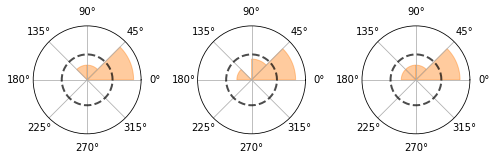

In [32]:
import matplotlib.pyplot as plt
import numpy as np


# Construct figure and axis to plot on
figsize=(7,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)

# Visualise by area of bins
for i,angles,color in zip(ax_lst,angle_lst,color_lst):
    circular_hist(axs[i], x=angles,color=color,edgecolor=color,**kwargs)
    axs[i].plot(x_values,np.sqrt(2)*y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,3*y0])
plt.tight_layout()
print(f'model is {modelname}')
print(f"considering angles at times (tC,tB,tA)={(-tC,-tB,-tA)} milliseconds.")
# print(f"considering angles at times (tC,tB,tA)={(tC,tB,tA)} milliseconds.")
plt.show()

In [33]:
#LR results for DT = 0.5 ms
# modelname='luo-rudy'
#annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/creations_minr_1.0_mindur_20.0.csv"


# #LR results for DT = 0.025 ms
#annihilations aggregated
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv'
# # #creations aggregated
input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/creations_minr_1.0_mindur_20.0.csv'


# #FK results for DT = 0.4 ms
# #annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"

# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/annihilations/ic001.21_traj_sr_600_mem_0_annihilations.csv"
df=pd.read_csv(input_fn)
# df.head()

In [34]:
#slice df to a given tbirth
t_values=sorted(set(df.tbirth.values))

# #FK
# tA=t_values[0]#.4
# tB=t_values[9]#4.
# tC=t_values[49]#20.
#LR
tA=t_values[0]
tB=t_values[7]
tC=t_values[79]#15]#39]

print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")

anglesA=df[df.tbirth==tA].theta.values
anglesB=df[df.tbirth==tB].theta.values
anglesC=df[df.tbirth==tC].theta.values

ax_lst=[0,1,2]
color_lst=[c,c,c]
# color_lst=['C0','C1','C2']
angle_lst=[anglesA,anglesB,anglesC]

considering angles at times (tA,tB,tC)=(0.025, 0.2, 2.0) milliseconds.


In [35]:
kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

In [36]:
print(f"the number of events considered is {anglesA.shape[0]}.")

the number of events considered is 114.


model is luo-rudy
considering angles at times (tA,tB,tC)=(0.025, 0.2, 2.0) milliseconds.


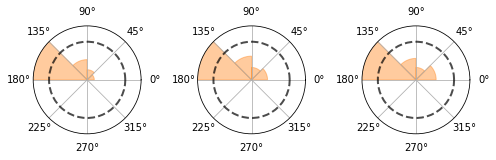

In [37]:
figsize=(7,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)

# Visualise by area of bins
for i,angles,color in zip(ax_lst,angle_lst,color_lst):
    circular_hist(axs[i], x=angles,color=color,edgecolor=color,**kwargs)
    axs[i].plot(x_values,np.sqrt(2)*y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,2*y0])
plt.tight_layout()
print(f'model is {modelname}')
print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")
plt.show()

## Fenton-Karma

In [19]:
#LR results for DT = 0.5 ms
modelname='fenton-karma'
#annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/creations_minr_1.0_mindur_20.0.csv"

# #FK results for DT = 0.4 ms
# #annihilations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"

# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/annihilations/ic001.21_traj_sr_600_mem_0_annihilations.csv"
df=pd.read_csv(input_fn)
df.head()

,pid,pid_deathmate,tdeath,phi1,phi2,phi_sum,phi_diff,r,theta
0,188,180,977.2,0.564566,1.037962,1.602528,0.473396,2.325075,0.574307
1,188,180,976.8,0.559048,1.012956,1.572005,0.453908,2.305453,0.565974
2,188,180,976.4,0.555315,0.989428,1.544743,0.434113,2.289216,0.561129
3,188,180,976.0,0.554263,0.967040,1.521302,0.412777,2.275170,0.557397
4,188,180,975.6,0.551317,0.945882,1.497200,0.394565,2.263316,0.555014


In [20]:
#slice df to a given tdeath
t_values=sorted(set(df.tdeath.values))
# t_values=sorted(set(df.tbirth.values))

# #FK
tA=t_values[0]#.4
tB=t_values[9]#4.
tC=t_values[99]#49]#20.
# #LR
# tA=t_values[0]
# tB=t_values[7]
# tC=t_values[79]#15]#39]

print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")

anglesA=df[df.tdeath==tA].theta.values
anglesB=df[df.tdeath==tB].theta.values
anglesC=df[df.tdeath==tC].theta.values

# anglesA=df[df.tbirth==tA].theta.values
# anglesB=df[df.tbirth==tB].theta.values
# anglesC=df[df.tbirth==tC].theta.values


ax_lst=[2,1,0]
c='C0'
color_lst=[c,c,c]
# color_lst=['C0','C1','C2']
angle_lst=[anglesA,anglesB,anglesC]

considering angles at times (tA,tB,tC)=(0.4, 4.0, 40.0) milliseconds.


In [21]:
#angular histogram viewer from optical_flow
# the area of each bin is proportional to the number of observations in it,
bins=4*4
symmetrize=False
density=True

In [22]:
kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

In [23]:
print(f"the number of events considered is {anglesA.shape[0]}.")

the number of events considered is 3010.


In [24]:
from lib.viewer import *

model is fenton-karma
considering angles at times (tC,tB,tA)=(-40.0, -4.0, -0.4) milliseconds.


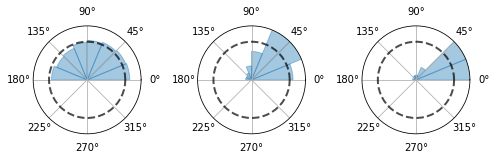

In [25]:
import matplotlib.pyplot as plt
import numpy as np


# Construct figure and axis to plot on
figsize=(7,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)

# Visualise by area of bins
for i,angles,color in zip(ax_lst,angle_lst,color_lst):
    circular_hist(axs[i], x=angles,color=color,edgecolor=color,**kwargs)
    axs[i].plot(x_values,np.sqrt(2)*y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,2*y0])
plt.tight_layout()
print(f'model is {modelname}')
print(f"considering angles at times (tC,tB,tA)={(-tC,-tB,-tA)} milliseconds.")
# print(f"considering angles at times (tC,tB,tA)={(tC,tB,tA)} milliseconds.")
plt.show()

In [26]:
#LR results for DT = 0.5 ms
# modelname='luo-rudy'
#annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/creations_minr_1.0_mindur_20.0.csv"

# #FK results for DT = 0.4 ms
# #annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"

# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/annihilations/ic001.21_traj_sr_600_mem_0_annihilations.csv"
df=pd.read_csv(input_fn)
# df.head()

In [27]:
#slice df to a given tbirth
t_values=sorted(set(df.tbirth.values))

# #FK
# tA=t_values[0]#.4
# tB=t_values[9]#4.
# tC=t_values[49]#20.
# #LR
# tA=t_values[0]
# tB=t_values[7]
# tC=t_values[79]#15]#39]

print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")

anglesA=df[df.tbirth==tA].theta.values
anglesB=df[df.tbirth==tB].theta.values
anglesC=df[df.tbirth==tC].theta.values

ax_lst=[0,1,2]
color_lst=[c,c,c]
# color_lst=['C0','C1','C2']
angle_lst=[anglesA,anglesB,anglesC]

considering angles at times (tA,tB,tC)=(0.4, 4.0, 40.0) milliseconds.


In [28]:
kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

In [29]:
print(f"the number of events considered is {anglesA.shape[0]}.")

the number of events considered is 7866.


model is fenton-karma
considering angles at times (tA,tB,tC)=(0.4, 4.0, 40.0) milliseconds.


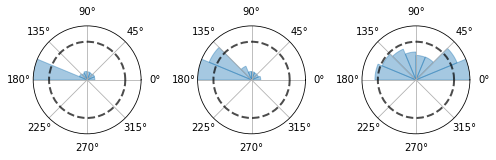

In [30]:
figsize=(7,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)

# Visualise by area of bins
for i,angles,color in zip(ax_lst,angle_lst,color_lst):
    circular_hist(axs[i], x=angles,color=color,edgecolor=color,**kwargs)
    axs[i].plot(x_values,np.sqrt(2)*y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,2*y0])
plt.tight_layout()
print(f'model is {modelname}')
print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")
plt.show()

# overlay angular histograms for theLuo-Rudy and Fenton-Karma models.

### for annihilations

In [31]:
#DONE: verified that fenton-karma is blue
#DONE: get all annihilation angles in one place
#DONE: overlay
#DONE: get all annihilation angles in one place
#DONE: overlay

In [11]:
#times of 3 snapshots
tA=.4
tB=4
tC=20

#LR results for DT = 0.5 ms
# modelname='luo-rudy'
#annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
df_lr=pd.read_csv(input_fn)

# #LR results for DT = 0.025 ms
#annihilations aggregated
input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv'
# # #creations aggregated
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/creations_minr_1.0_mindur_20.0.csv'

df_lr=pd.read_csv(input_fn)
# #FK results for DT = 0.4 ms
# #annihilations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
df_fk=pd.read_csv(input_fn)

# input_fn=search_for_file()

#TODO: make outputs simultaneously visible for LR and FK results (dt=0.5,0.4, respectively)

#slice df to a given tdeath
df=df_lr.copy()
t_values=sorted(set(df.tdeath.values))
# t_values=sorted(set(df.tbirth.values))

# #LR
# tA=t_values[0]
# tB=t_values[7]
# tC=t_values[79]#15]#39]

string=f"considering angles at times {(-tC,-tB,-tA)} milliseconds (LR)."
print(string)
string_LR=string

anglesA=df[df.tdeath==tA].theta.values
anglesB=df[df.tdeath==tB].theta.values
anglesC=df[df.tdeath==tC].theta.values

# anglesA=df[df.tbirth==tA].theta.values
# anglesB=df[df.tbirth==tB].theta.values
# anglesC=df[df.tbirth==tC].theta.values

angle_lst=[anglesA,anglesB,anglesC]
angle_lst_LR=angle_lst

#slice df to a given tdeath
df=df_fk.copy()
t_values=sorted(set(df.tdeath.values))
# t_values=sorted(set(df.tbirth.values))

# #FK
# tA=0.4#t_values[0]#.4
# tB=4.#t_values[9]#4.
# tC=40#t_values[99]#20.

string=f"considering angles at times {(-tC,-tB,-tA)} milliseconds (FK)."
print(string)
string_FK=string

anglesA=df[df.tdeath==tA].theta.values
anglesB=df[df.tdeath==tB].theta.values
anglesC=df[df.tdeath==tC].theta.values

# anglesA=df[df.tbirth==tA].theta.values
# anglesB=df[df.tbirth==tB].theta.values
# anglesC=df[df.tbirth==tC].theta.values

ax_lst=[2,1,0]
angle_lst=[anglesA,anglesB,anglesC]
angle_lst_FK=angle_lst

FileNotFoundError: [Errno 2] No such file or directory: '/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv'

In [280]:
#angular histogram viewer from optical_flow
# the area of each bin is proportional to the number of observations in it,
bins=4*2
symmetrize=False
density=True

In [281]:
kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

In [282]:
print(f"the number of events considered is {angle_lst_FK[0].shape[0]}. (FK)")
print(f"the number of events considered is {angle_lst_LR[0].shape[0]}. (LR)")

the number of events considered is 3010. (FK)
the number of events considered is 12. (LR)


these are annihilations for FK (blue) and LR (orange)
considering angles at the times:
considering angles at times (-20, -4, -0.4) milliseconds (FK).
considering angles at times (-20, -4, -0.4) milliseconds (LR).
the number of events considered is 3010. (FK)
the number of events considered is 12. (LR)


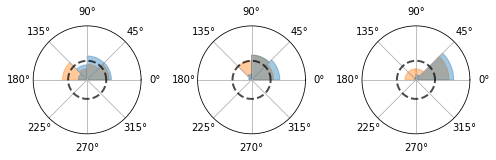

In [283]:
#visualise by area of bins
figsize=(7,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)
for i,angles in zip(ax_lst,angle_lst_LR):
    circular_hist(axs[i], x=angles,color='C1',edgecolor='C1',**kwargs)
    
for i,angles in zip(ax_lst,angle_lst_FK):
    circular_hist(axs[i], x=angles,color='C0',edgecolor='C0',**kwargs)

for i in ax_lst:
    axs[i].plot(x_values,np.sqrt(2)*y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,4*y0])
    
#print bluf
print(f'these are annihilations for FK (blue) and LR (orange)')
print(f"considering angles at the times:")
print(string_FK)
print(string_LR)
print(f"the number of events considered is {angle_lst_FK[0].shape[0]}. (FK)")
print(f"the number of events considered is {angle_lst_LR[0].shape[0]}. (LR)")
# print(f"considering angles at times (tC,tB,tA)={(tC,tB,tA)} milliseconds.")
plt.tight_layout()
plt.show()

### repeat for creations

In [220]:
# #FK results for DT = 0.4 ms
# # #creations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"
df_fk=pd.read_csv(input_fn)

#LR results for DT = 0.5 ms
#creations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/creations_minr_1.0_mindur_20.0.csv"
df_lr=pd.read_csv(input_fn)

In [44]:
#TODO: make outputs simultaneously visible for LR and FK results (dt=0.5,0.4, respectively)

In [221]:
#slice df to a given tdeath
df=df_lr
# t_values=sorted(set(df.tdeath.values))
t_values=sorted(set(df.tbirth.values))

#LR
tA=t_values[0]
tB=t_values[7]
tC=t_values[79]#15]#39]

string=f"considering angles at times {(tA,tB,tC)} milliseconds (LR)."
print(string)
string_LR=string

# anglesA=df[df.tdeath==tA].theta.values
# anglesB=df[df.tdeath==tB].theta.values
# anglesC=df[df.tdeath==tC].theta.values

anglesA=df[df.tbirth==tA].theta.values
anglesB=df[df.tbirth==tB].theta.values
anglesC=df[df.tbirth==tC].theta.values

angle_lst=[anglesA,anglesB,anglesC]
angle_lst_FK=angle_lst

#slice df to a given tdeath
df=df_fk
# t_values=sorted(set(df.tdeath.values))
t_values=sorted(set(df.tbirth.values))

#FK
tA=t_values[0]#.4
tB=t_values[9]#4.
tC=t_values[99]#20.

string=f"considering angles at times {(tA,tB,tC)} milliseconds (FK)."
print(string)
string_FK=string

# anglesA=df[df.tdeath==tA].theta.values
# anglesB=df[df.tdeath==tB].theta.values
# anglesC=df[df.tdeath==tC].theta.values

anglesA=df[df.tbirth==tA].theta.values
anglesB=df[df.tbirth==tB].theta.values
anglesC=df[df.tbirth==tC].theta.values

ax_lst=[0,1,2]
angle_lst=[anglesA,anglesB,anglesC]
angle_lst_LR=angle_lst

considering angles at times (0.5, 4.0, 40.0) milliseconds (LR).
considering angles at times (0.4, 4.0, 40.0) milliseconds (FK).


In [222]:
#angular histogram viewer from optical_flow
# the area of each bin is proportional to the number of observations in it,
bins=4*4
symmetrize=False
density=True

In [223]:
kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

In [224]:
print(f"the number of events considered is {angle_lst_FK[0].shape[0]}. (FK)")
print(f"the number of events considered is {angle_lst_LR[0].shape[0]}. (LR)")

the number of events considered is 3853. (FK)
the number of events considered is 7866. (LR)


these are creations for FK (blue) and LR (orange)
considering angles at the times:
considering angles at times (0.4, 4.0, 40.0) milliseconds (FK).
considering angles at times (0.5, 4.0, 40.0) milliseconds (LR).
the number of events considered is 3853. (FK)
the number of events considered is 7866. (LR)


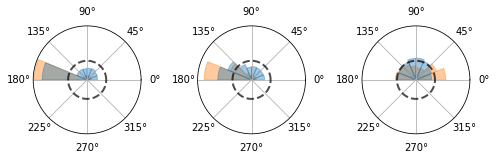

In [225]:
#visualise by area of bins
figsize=(7,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)
for i,angles in zip(ax_lst,angle_lst_LR):
    circular_hist(axs[i], x=angles,color='C1',edgecolor='C1',**kwargs)
    
for i,angles in zip(ax_lst,angle_lst_FK):
    circular_hist(axs[i], x=angles,color='C0',edgecolor='C0',**kwargs)

for i in ax_lst:
    axs[i].plot(x_values,np.sqrt(2)*y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,4*y0])
    
#print bluf
print(f'these are creations for FK (blue) and LR (orange)')
print(f"considering angles at the times:")
print(string_FK)
print(string_LR)
print(f"the number of events considered is {angle_lst_FK[0].shape[0]}. (FK)")
print(f"the number of events considered is {angle_lst_LR[0].shape[0]}. (LR)")
# print(f"considering angles at times (tC,tB,tA)={(tC,tB,tA)} milliseconds.")
plt.tight_layout()
plt.show()

considering angles at times (-40.0, -4.0, -0.5) milliseconds (LR).
considering angles at times (-40.0, -4.0, -0.4) milliseconds (FK).
the number of events considered is 744. (FK)
the number of events considered is 3010. (LR)
these are annihilations for FK (blue) and LR (orange)
considering angles at the times:
considering angles at times (-40.0, -4.0, -0.4) milliseconds (FK).
considering angles at times (-40.0, -4.0, -0.5) milliseconds (LR).
the number of events considered is 744. (FK)
the number of events considered is 3010. (LR)


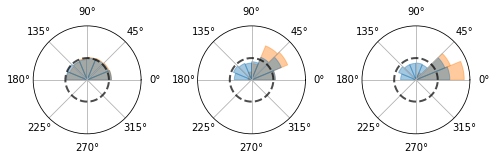

In [51]:
#LR results for DT = 0.5 ms
# modelname='luo-rudy'
#annihilations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
df_lr=pd.read_csv(input_fn)


# #FK results for DT = 0.4 ms
# #annihilations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
df_fk=pd.read_csv(input_fn)

# input_fn=search_for_file()

#TODO: make outputs simultaneously visible for LR and FK results (dt=0.5,0.4, respectively)

#slice df to a given tdeath
df=df_lr
t_values=sorted(set(df.tdeath.values))
# t_values=sorted(set(df.tbirth.values))

#LR
tA=t_values[0]
tB=t_values[7]
tC=t_values[79]#15]#39]

string=f"considering angles at times {(-tC,-tB,-tA)} milliseconds (LR)."
print(string)
string_LR=string

anglesA=df[df.tdeath==tA].theta.values
anglesB=df[df.tdeath==tB].theta.values
anglesC=df[df.tdeath==tC].theta.values

# anglesA=df[df.tbirth==tA].theta.values
# anglesB=df[df.tbirth==tB].theta.values
# anglesC=df[df.tbirth==tC].theta.values

angle_lst=[anglesA,anglesB,anglesC]
angle_lst_FK=angle_lst

#slice df to a given tdeath
df=df_fk
t_values=sorted(set(df.tdeath.values))
# t_values=sorted(set(df.tbirth.values))

#FK
tA=t_values[0]#.4
tB=t_values[9]#4.
tC=t_values[99]#20.

string=f"considering angles at times {(-tC,-tB,-tA)} milliseconds (FK)."
print(string)
string_FK=string

anglesA=df[df.tdeath==tA].theta.values
anglesB=df[df.tdeath==tB].theta.values
anglesC=df[df.tdeath==tC].theta.values

# anglesA=df[df.tbirth==tA].theta.values
# anglesB=df[df.tbirth==tB].theta.values
# anglesC=df[df.tbirth==tC].theta.values

ax_lst=[2,1,0]
angle_lst=[anglesA,anglesB,anglesC]
angle_lst_LR=angle_lst

#angular histogram viewer from optical_flow
# the area of each bin is proportional to the number of observations in it,
bins=4*4
symmetrize=False
density=True

kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

print(f"the number of events considered is {angle_lst_FK[0].shape[0]}. (FK)")
print(f"the number of events considered is {angle_lst_LR[0].shape[0]}. (LR)")

#visualise by area of bins
figsize=(7,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)
for i,angles in zip(ax_lst,angle_lst_LR):
    circular_hist(axs[i], x=angles,color='C1',edgecolor='C1',**kwargs)
    
for i,angles in zip(ax_lst,angle_lst_FK):
    circular_hist(axs[i], x=angles,color='C0',edgecolor='C0',**kwargs)

for i in ax_lst:
    axs[i].plot(x_values,np.sqrt(2)*y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,3.5*y0])
    
#print bluf
print(f'these are annihilations for FK (blue) and LR (orange)')
print(f"considering angles at the times:")
print(string_FK)
print(string_LR)
print(f"the number of events considered is {angle_lst_FK[0].shape[0]}. (FK)")
print(f"the number of events considered is {angle_lst_LR[0].shape[0]}. (LR)")
# print(f"considering angles at times (tC,tB,tA)={(tC,tB,tA)} milliseconds.")
plt.tight_layout()
plt.show()

# colored time plots for annihilation/creation events

In [284]:
# #times of 3 snapshots
# tA=.4
# tB=4
# tC=40

In [285]:
# #LR results for DT = 0.5 ms
# # modelname='luo-rudy'
# #annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"


# # #LR results for DT = 0.025 ms
# #annihilations aggregated
# # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv'
# # # #creations aggregated
# # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/creations_minr_1.0_mindur_20.0.csv'
# df_lr=pd.read_csv(input_fn)

# # #FK results for
# # #annihilations aggregated
# #DT = 0.4 ms
# # input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# #DT=0.025 ms
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv'
# df_fk=pd.read_csv(input_fn)

# # input_fn=search_for_file()
# #TODO: make outputs simultaneously visible for LR and FK results (dt=0.5,0.4, respectively)

In [286]:
df_fk.sort_values('tdeath',ascending=True,inplace=True)
df_lr.sort_values('tdeath',ascending=True,inplace=True)

In [295]:
# print(f"number of trials is {len(sorted(set(df_lr.pid.values)))} (LR) and {len(sorted(set(df_fk.pid.values)))} (FK).")

#compute xy values
x_label='time (ms)'#'t'
# x_label='time after annihilation (ms)'#'t'
y_label='inward/outward\nangle (radians)'#'$\vartheta$'
# 'r (cm)'
# 'dr/dt (cm/ms)'

df_phases=df_lr.copy()
t_values=sorted(set(df_phases.tdeath.values))
DT=sorted(set(df_phases.tdeath.values))[0]
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
# dfm=df_phases.groupby('tbirth').mean()
# dfs=df_phases.groupby('tbirth').std()
dfm=df_phases.groupby('tdeath').mean()
dfs=df_phases.groupby('tdeath').std()
x_values_lr=dfm.index.values
y_values_lr=dfm.theta.values
yerr_values_lr=dfs.theta.values

df_phases=df_fk.copy()
t_values=sorted(set(df_phases.tdeath.values))
DT=sorted(set(df_phases.tdeath.values))[0]
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
# dfm=df_phases.groupby('tbirth').mean()
# dfs=df_phases.groupby('tbirth').std()
dfm=df_phases.groupby('tdeath').mean()
dfs=df_phases.groupby('tdeath').std()
x_values_fk=dfm.index.values
y_values_fk=dfm.theta.values
yerr_values_fk=dfs.theta.values

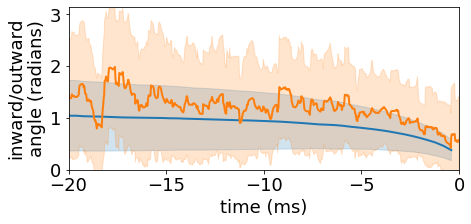

In [292]:
fontsize=18
fig,ax=plt.subplots(ncols=1,figsize=(7,3))#(5,4))
# axes=[1e-1,2,1e-3,0.2]
alpha=0.2
# FK
ax.fill_between(-x_values_fk, y_values_fk-yerr_values_fk, y_values_fk+yerr_values_fk,color='C0',alpha=alpha)
ax.plot(-x_values_fk,y_values_fk,'C0',lw=2)
#LR
ax.fill_between(-x_values_lr, y_values_lr-yerr_values_lr, y_values_lr+yerr_values_lr,color='C1',alpha=alpha)
ax.plot(-x_values_lr,y_values_lr,'C1',lw=2)

#TODO: add cuts for times



ax.set_xlim([-20,0])#-DT])
# ax.set_xlim([-50,-DT])
ax.set_ylim([0,np.pi])
ax.set_xlabel(x_label,fontsize=fontsize)
ax.set_ylabel(y_label,fontsize=fontsize)
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)

#wrong bluf because aggregate
# print(f"number of trials is {len(sorted(set(df_lr.pid.values)))} (LR) and {len(sorted(set(df_fk.pid.values)))} (FK).")
plt.show()

In [11]:
#plot the mean drdt versus r
#compute xy values
x_label='r (cm)'
y_label='dr/dt (cm/ms)'

df_fk.sort_values('tdeath',ascending=True,inplace=True)
df_lr.sort_values('tdeath',ascending=True,inplace=True)

df_phases=df_lr.copy()
t_values=sorted(set(df_phases.tdeath.values))
DT=sorted(set(df_phases.tdeath.values))[0]
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
# dfm=df_phases.groupby('tbirth').mean()
# dfs=df_phases.groupby('tbirth').std()
dfm=df_phases.groupby('tdeath').mean()
dfs=df_phases.groupby('tdeath').std()
t_values=dfm.index.values
range_values=dfm.r.values
drdt_values=np.diff(range_values)/DT
r_values=range_values[1:]/2+range_values[:-1]/2
x_values_lr=r_values
y_values_lr=drdt_values
# yerr_values_lr=dfs.theta.values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
rmax=1.2 #cm
boo=r_values<rmax
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values

dict_force_fit_lr=dict_force_fit
y_hat_values_lr=y_hat_values

df_phases=df_fk.copy()
t_values=sorted(set(df_phases.tdeath.values))
DT=sorted(set(df_phases.tdeath.values))[0]
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
# dfm=df_phases.groupby('tbirth').mean()
# dfs=df_phases.groupby('tbirth').std()
dfm=df_phases.groupby('tdeath').mean()
dfs=df_phases.groupby('tdeath').std()
t_values=dfm.index.values
range_values=dfm.r.values
drdt_values=np.diff(range_values)/DT
r_values=range_values[1:]/2+range_values[:-1]/2
x_values_fk=r_values
y_values_fk=drdt_values
# yerr_values_fk=dfs.theta.values

#fit drdt_values to F0+F1/r with OLS fit for FK model where 1/r is greater than 2 1/cm
rmax=0.5 #cm
boo=r_values<rmax
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values
dict_force_fit_fk=dict_force_fit
y_hat_values_fk=y_hat_values

NameError: name 'df_fk' is not defined

In [379]:
print(f"the best fits are\n {dict_force_fit_lr} (LR) and \n{dict_force_fit_fk} (FK).")

the best fits are
 {'m': 0.3159199026751975, 'Delta_m': 0.030859220439950204, 'b': -0.2559505933481997, 'Delta_b': 0.02847159863995168, 'Rsquared': 0.5521731445610751} (LR) and 
{'m': 0.037282567885389944, 'Delta_m': 0.0006465463607779418, 'b': -0.04866949942754961, 'Delta_b': 0.0018307907016742225, 'Rsquared': 0.9990235572199276} (FK).


In [380]:
def print_dict(input_dict):
    for key in input_dict.keys():
        print(f"{key}={input_dict[key]}")

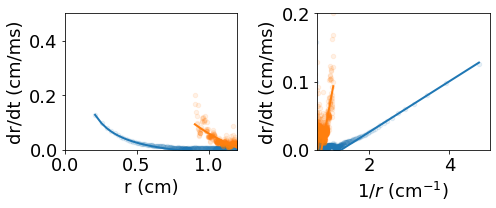

In [384]:
fontsize=18
alpha=0.1

fig,axs=plt.subplots(ncols=2,figsize=(7,3))#(5,4))
ax=axs[0]
ax.scatter(x_values_fk,y_values_fk,c='C0',s=20,alpha=alpha)
ax.scatter(x_values_lr,y_values_lr,c='C1',s=20,alpha=alpha)

#plot fits
ax.plot(x_values_fk,y_hat_values_fk,c='C0',lw=2,alpha=1)
ax.plot(x_values_lr,y_hat_values_lr,c='C1',lw=2,alpha=1)

ax.set_xlim([0,1.2])
ax.set_ylim([-0.1,.5])
ax.set_xlabel(x_label,fontsize=fontsize)
ax.set_ylabel(y_label,fontsize=fontsize)
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)

ax=axs[1]
ax.scatter(1/x_values_fk,y_values_fk,c='C0',s=20,alpha=alpha)
ax.scatter(1/x_values_lr,y_values_lr,c='C1',s=20,alpha=alpha)

#plot fits
ax.plot(1/x_values_fk,y_hat_values_fk,c='C0',lw=2,alpha=1)
ax.plot(1/x_values_lr,y_hat_values_lr,c='C1',lw=2,alpha=1)

# y_hat_values_fk
# y_hat_values_fk

ax.set_xlim([.7,5])
ax.set_ylim([-0.1,.2])
ax.set_xlabel(r'$1/r$ (cm$^{-1}$)',fontsize=fontsize)
ax.set_ylabel(y_label,fontsize=fontsize)

# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)
#wrong bluf because aggregate
plt.tight_layout()
plt.show()

$$
F(r)\propto\frac{dr}{dt} = b + \frac{m}{r}
$$

In [ ]:
#TODO: try any more annihilation plots... 
# HINT: any from the following 3 panel
# HINT: are phi values present/convenient? Yes.
#TODO: condense the figures we like into functions. test on FK model
#TODO: make comparable functions for LR model. 

In [385]:
print(f"the ols fit for FK:")
print_dict(dict_force_fit_fk)
print(f"\nthe ols fit for LR:")
print_dict(dict_force_fit_lr)

the ols fit for FK:
m=0.037282567885389944
Delta_m=0.0006465463607779418
b=-0.04866949942754961
Delta_b=0.0018307907016742225
Rsquared=0.9990235572199276

the ols fit for LR:
m=0.3159199026751975
Delta_m=0.030859220439950204
b=-0.2559505933481997
Delta_b=0.02847159863995168
Rsquared=0.5521731445610751


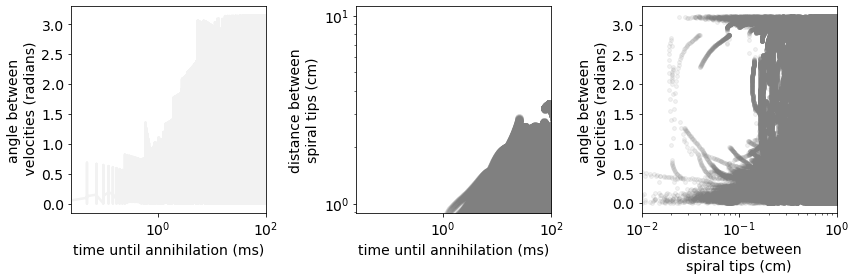

In [183]:
saving=False
savefig_folder=f"{nb_dir}/Figures"
savefig_fn=f"lr-annihilations.png"
fontsize=14
tmax=1e2
alpha=.1
fig,axs=plt.subplots(ncols=3,figsize=(12,4))#(5,4))

# y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
# ax_lst=[0,0,1,1]
# c_lst=['C0','C1','C0','C1']

#extract local particle values
# pid_lst=list(set(df_phases.pid.values))
# for pid in pid_lst:#[:10]:
#     boo=df_phases.pid==pid
t_values=df_phases.tdeath.values
range_values=df_phases.r.values
theta_values=df_phases.theta.values

x_values=t_values
y_values=theta_values
ax=axs[0]
ax.plot(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',lw=2.5)
ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
ax.set_xlim([DT,tmax])
ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)

#plot range versus time until death
x_values=t_values
y_values=range_values
ax=axs[1]
ax.scatter(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',lw=2.5)
ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
ax.set_ylabel('distance between\nspiral tips (cm)',fontsize=fontsize)
ax.set_xlim([DT,tmax])
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)

# plot angle between versus range (left)
x_values=range_values
y_values=theta_values
ax=axs[2]
ax.scatter(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',s=15)
ax.set_xlabel('distance between\nspiral tips (cm)',fontsize=fontsize)
ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
ax.set_xlim([1e-2,1])
ax.set_xscale('log')
#     ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)   


    
# axs[0].set_title('phi_1 and phi_2 \n',fontsize=fontsize)
# axs[1].set_title('phi_sum and phi_diff \n',fontsize=fontsize)
plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")


plt.tight_layout()
if not saving: 
    plt.show() 
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

AttributeError: 'DataFrame' object has no attribute 'tdeath'

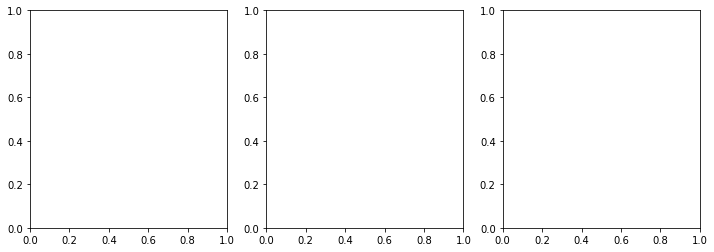

In [56]:
saving=False
savefig_folder=f"{nb_dir}/Figures"
savefig_fn=f"lr-annihilations.png"
fontsize=14
tmax=1e2
alpha=.1
fig,axs=plt.subplots(ncols=3,figsize=(12,4))#(5,4))

# y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
# ax_lst=[0,0,1,1]
# c_lst=['C0','C1','C0','C1']

#extract local particle values
pid_lst=list(set(df_phases.pid.values))
for pid in pid_lst:#[:10]:
    boo=df_phases.pid==pid
    t_values=df_phases[boo].tdeath.values
    range_values=df_phases[boo].r.values
    theta_values=df_phases[boo].theta.values
    
    x_values=t_values
    y_values=theta_values
    ax=axs[0]
    ax.plot(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',lw=2.5)
    ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
    ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
    ax.set_xlim([DT,tmax])
    ax.set_xscale('log')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=1)

    #plot range versus time until death
    x_values=t_values
    y_values=range_values
    ax=axs[1]
    ax.plot(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',lw=2.5)
    ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
    ax.set_ylabel('distance between\nspiral tips (cm)',fontsize=fontsize)
    ax.set_xlim([DT,tmax])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=1)

    # plot angle between versus range (left)
    x_values=range_values
    y_values=theta_values
    ax=axs[2]
    ax.scatter(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',s=15)
    ax.set_xlabel('distance between\nspiral tips (cm)',fontsize=fontsize)
    ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
    ax.set_xlim([1e-2,1])
    ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=1)   
    

    
# axs[0].set_title('phi_1 and phi_2 \n',fontsize=fontsize)
# axs[1].set_title('phi_sum and phi_diff \n',fontsize=fontsize)
plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")


plt.tight_layout()
if not saving: 
    plt.show() 
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [ ]:
# tA=DT # 0.4 #ms
# tB=2   #ms
# tC=20  #ms
# #iterate over all annihilation events computing/plotting the shortest trajectory if it is long enough and if it gets further than a certain range
# df_deaths=df_phases
# saving=False
# savefig_folder=f"{nb_dir}/Figures"
# savefig_fn=f"angles-between-deaths-b-lr.png"
# # savefig_fn=f"angles-between-deaths-b.png"
# fontsize=16
# bins=6
# tmax=1e2
# #plot naive range at death and birth
# fig,axs=plt.subplots(ncols=2,figsize=(12,5))

# # y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# # y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# y_label_lst=[r'$\vartheta$']
# ax_lst=[1]
# c_lst=['gray']
# # angle_threshold=2.3
# val1_lst=[];val2_lst=[];val3_lst=[]
# #extract local particle values
# pid_lst=list(set(df_deaths.pid.values))
# for pid in pid_lst:#[:10]:
#     boo=df_deaths.pid==pid
#     y_values_lst=[df_deaths[boo].theta.values]
#     x_values=df_deaths[boo]['tdeath'].values
#     for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
#         ax=axs[nax]
#         ax.plot(x_values,y_values,alpha=.3,label='_Hidden',c=color,lw=2.5)

#         boo1=np.isclose(x_values,tA)
#         boo2=np.isclose(x_values,tB)
#         boo3=np.isclose(x_values,tC)
#         val1=y_values[boo1]
#         val2=y_values[boo2]
#         val3=y_values[boo3]
#         if val1.shape[0]>0:
#             val1_lst.append(val1[0])
#             val2_lst.append(val2[0])
#             val3_lst.append(val3[0])
            
# ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
# ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
# ax.set_xlim([DT,tmax])
# ax.set_xscale('log')
# ax.tick_params(axis='both', which='major', labelsize=fontsize)
# ax.tick_params(axis='both', which='minor', labelsize=1)
                
# # fontsize=16
# # fig,ax=plt.subplots(ncols=1,figsize=(5,5))
# ax=axs[0]
# # ax.hist(val1_lst,bins=bins,density=True,color='C0',label=f't=-{tA:.1f} ms',alpha=0.7)
# ax.hist(val2_lst,bins=bins,density=True,color='C1',label=f't=-{tB:.1f} ms',alpha=0.7)
# ax.hist(val3_lst,bins=bins,density=True,color='C2',label=f't=-{tC:.1f} ms',alpha=0.7)
# ax.legend(fontsize=fontsize)
# #plot control
# xv=np.arange(0,np.pi,0.1)
# ax.plot(xv,xv*0.+1/np.pi,'k--')#,color='gray',)
# ax.set_xlabel('angle between\n velocities (radians)',fontsize=fontsize)
# ax.set_ylabel(r'prob. density',fontsize=fontsize)
# ax.tick_params(axis='both', which='major', labelsize=fontsize)
# ax.tick_params(axis='both', which='minor', labelsize=1)
            
# plt.tight_layout()
# # plt.show()
# # print(f"\ttime between two frames was {0.001} ms")
# plt.tight_layout()
# if not saving:
#     plt.show()
# else:
#     os.chdir(savefig_folder)
#     plt.savefig(savefig_fn, dpi=300)
#     print(f"saved figure in \n\t{savefig_fn}")

#     #     plt.close()

In [ ]:
# fontsize=16
# saving=False
# savefig_folder=f"{nb_dir}/Figures"
# savefig_fn=f"fine-death-range-phase.png"
# #plot naive range at death and birth
# fig,axs=plt.subplots(ncols=2,figsize=(12,5))#(5,4))

# # y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# # y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
# ax_lst=[0,0,1,1]
# c_lst=['C0','C1','C0','C1']

# #extract local particle values
# pid_lst=list(set(df_phases.pid.values))
# for pid in pid_lst[:10]:
#     boo=df_phases.pid==pid
#     y_values_lst=[df_phases[boo].phi1.values,df_phases[boo].phi2.values,df_phases[boo].phi_sum.values, df_phases[boo].phi_diff.values]
#     x_values=df_phases[boo].tdeath.values
#     for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
#         ax=axs[nax]
#         ax.plot(x_values,y_values,alpha=.3,label='_Hidden',c=color,lw=2.5)
#         # plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
#         ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
#         ax.set_ylabel('signed phase (rad)',fontsize=fontsize)

#         ax.set_xlim([DT,1e1])
#     #     ax.set_ylim([-np.pi/8,np.pi/8])
#         #     ax.set_xlim([1e-3,1e2])
#         ax.set_xscale('log')
#         # plt.yscale('log')
#         ax.tick_params(axis='both', which='major', labelsize=fontsize)
#         ax.tick_params(axis='both', which='minor', labelsize=1)
#     #     ax.legend(fontsize=fontsize)
# axs[0].set_title('phi_1 and phi_2 \n',fontsize=fontsize)
# axs[1].set_title('phi_sum and phi_diff \n',fontsize=fontsize)
# plt.tight_layout()
# # plt.show()
# # print(f"\ttime between two frames was {0.001} ms")
# plt.tight_layout()
# if not saving: 
#     plt.show() 
# else:
#     os.chdir(savefig_folder)
#     plt.savefig(savefig_fn, dpi=300)
#     print(f"saved figure in \n\t{savefig_fn}")
# #     plt.close()

In [ ]:
# fontsize=16
# saving=False
# savefig_folder=f"{nb_dir}/Figures/fine_death"
# savefig_fn=f"fine-death-range-phase.png"
# #plot naive range at death and birth
# fig,axs=plt.subplots(ncols=2,figsize=(12,5))#(5,4))

# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
# ax_lst=[0,0,1,1]
# c_lst=['C0','C1','C0','C1']

# for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
#     ax=axs[nax]
#     ax.plot(x_values,y_values,alpha=1.0,label=y_label,c=color,lw=2.5)
#     # plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
#     ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
#     ax.set_ylabel('signed phase (rad)',fontsize=fontsize)

#     ax.set_xlim([DT,1e1])
# #     ax.set_ylim([-np.pi/8,np.pi/8])
#     #     ax.set_xlim([1e-3,1e2])
#     ax.set_xscale('log')
#     # plt.yscale('log')
#     ax.tick_params(axis='both', which='major', labelsize=fontsize)
#     ax.tick_params(axis='both', which='minor', labelsize=1)
#     ax.legend(fontsize=fontsize)

# plt.tight_layout()
# # plt.show()
# # print(f"\ttime between two frames was {0.001} ms")
# plt.tight_layout()
# if not saving: 
#     plt.show() 
# else:
#     os.chdir(savefig_folder)
#     plt.savefig(savefig_fn, dpi=300)
#     print(f"saved figure in \n\t{savefig_fn}")
# #     plt.close()

__schema__
- t_until_death: time until death (index)
- range_values: distance from tip to other tip
- angle_values: angle between the velocity of one tip with the ray starting at the center of mass and extending out to the tip
- 

__TODO(later):__ convert this markdown cell into something that documents how angle_values were computed
$$
\text{Let   } \phi_1\equiv\cos^{-1}\big(\widehat{\mathbf{x}_2-\mathbf{x}_1}\;\cdot\;\hat{\mathbf{a}}_1\big),
$$

$$
\text{and let   } \phi_2\equiv\cos^{-1}\big(\widehat{\mathbf{x}_1-\mathbf{x}_2}\;\cdot\;\hat{\mathbf{a}}_2\big).
$$

denote the (unsigned) phases of particle 1 & 2, where $\mathbf{a}_1$ and $\mathbf{a}_2$ are perpendicular to $\nabla V\equiv$ (grad_ux,grad_uy).

In [ ]:
from lib.routines.dag_log_to_msd import *

In [ ]:
#generate trajectories, unwrapped trajectories, and mean squared displacements for folder of tip logs
ds=5
width=200
kwargs={
    'L':width,
    'DS':ds/width,
    'use_cache':True,
    'sr':3*width,
    'mem':0}

# input_fn=search_for_file();
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/Log/ic002.23_log.csv"
print(input_fn)
output_file_name=run_routine_log_to_unwrapped_trajectory(input_fn,**kwargs)

In [ ]:
# compute_angle_between_final_velocities
# get_compute_ranges_between
beep(6)

In [ ]:
#TODO: load existing spiral tip trajectory data
#TODO: compute_interactions
#TODO: compute_ranges_between 
#TODO: visually test compute_angle_between_final_velocities

#TODO: compute the angle between all tip annihilations.  save as csv
#TODO: remove any events with tips that did not last longer than min_duration
#TODO: remove any events with tips never had a range greater than min_range

#TODO: find matplotlib/preexisting example of angular histogram


In [ ]:
#Token fk model
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-300x300/ds_7.5_param_set_8/Log/ic300x300.0.6_traj_sr_600_mem_0.csv"
#Token lr model
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-lr-300x300/param_qu_tmax_30/trajectories/ic300x300.3.3_traj_sr_600_mem_0.csv"
ds=5
width=200
height=width
DS=ds/width

# input_fn=search_for_file()
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
df=pd.read_csv(input_fn)
print(input_fn)
DT=compute_DT(df,round_t_to_n_digits=3);print(f"the time resolution is {DT} ms.")



In [ ]:
df.head()

In [ ]:
input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
df_phases=compute_annihilation_events(input_fn,width,height,ds);#,**kwargs)
df_phases.head()

In [ ]:
#DONE: visually verify that the output makes sense
#DONE: wrap all ^this into a function
input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
save_fn=save_annihilation_events(input_fn,width,height,ds,save_folder=None,save_fn=None,printing=False)#,**kwargs)
print(save_fn)

In [ ]:
# #DONE: move ^this to lib
# #DONE: make routine and daskbag call to ^this for input_fn_lst
# kwargs={
#     width,height,ds,save_folder=None,save_fn=None
# }

In [ ]:
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
dfm=df_phases.groupby('tdeath').mean()
x_values=dfm.index.values
# y_values=dfm.phi_diff.values
y_values=dfm.theta.values
plt.plot(x_values,y_values)
plt.xlim([0,20])

In [ ]:
fontsize=16
#TODO: plot range versus time until death (right)
#TODO: plot angle between versus range (left)
tmax=1e2
fig,axs=plt.subplots(ncols=2,figsize=(12,5))#(5,4))

# y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
ax_lst=[0,0,1,1]
c_lst=['C0','C1','C0','C1']

#extract local particle values
pid_lst=list(set(df_phases.pid.values))
for pid in pid_lst[:10]:
    boo=df_phases.pid==pid
    range_values=df_phases[boo].r.values
    tdeath_values=df_phases[boo].tdeath.values
    theta_values=df_phases[boo].theta.values
    
    x_values=range_values
    y_values=theta_values
    ax=axs[0]
    ax.scatter(x_values,y_values,alpha=.3,label='_Hidden',c='gray',s=15)
    ax.set_xlabel('distance between\nspiral tips (cm)',fontsize=fontsize)
    ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
    ax.set_xlim([1e-2,1])
    ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=1)   
    
    x_values=tdeath_values
    y_values=range_values
    ax=axs[1]
    ax.plot(x_values,range_values,alpha=.3,label='_Hidden',c='gray',lw=2.5)
    ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
    ax.set_ylabel('distance between\nspiral tips (cm)',fontsize=fontsize)
    ax.set_xlim([DT,tmax])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=1)
    

    
# axs[0].set_title('phi_1 and phi_2 \n',fontsize=fontsize)
# axs[1].set_title('phi_sum and phi_diff \n',fontsize=fontsize)
plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")

saving=True
savefig_folder=f"{nb_dir}/Figures"
savefig_fn=f"angles-between-deaths-a-lr.png"
# savefig_fn=f"angles-between-deaths-a.png"
plt.tight_layout()
if not saving: 
    plt.show() 
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [ ]:
tA=DT # 0.4 #ms
tB=2   #ms
tC=20  #ms
#iterate over all annihilation events computing/plotting the shortest trajectory if it is long enough and if it gets further than a certain range
df_deaths=df_phases
saving=True
savefig_folder=f"{nb_dir}/Figures"
savefig_fn=f"angles-between-deaths-b-lr.png"
# savefig_fn=f"angles-between-deaths-b.png"
fontsize=16
bins=6
tmax=1e2
#plot naive range at death and birth
fig,axs=plt.subplots(ncols=2,figsize=(12,5))

# y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
y_label_lst=[r'$\vartheta$']
ax_lst=[1]
c_lst=['gray']
# angle_threshold=2.3
val1_lst=[];val2_lst=[];val3_lst=[]
#extract local particle values
pid_lst=list(set(df_deaths.pid.values))
for pid in pid_lst:#[:10]:
    boo=df_deaths.pid==pid
    y_values_lst=[df_deaths[boo].theta.values]
    x_values=df_deaths[boo]['tdeath'].values
    for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
        ax=axs[nax]
        ax.plot(x_values,y_values,alpha=.3,label='_Hidden',c=color,lw=2.5)

        boo1=np.isclose(x_values,tA)
        boo2=np.isclose(x_values,tB)
        boo3=np.isclose(x_values,tC)
        val1=y_values[boo1]
        val2=y_values[boo2]
        val3=y_values[boo3]
        if val1.shape[0]>0:
            val1_lst.append(val1[0])
            val2_lst.append(val2[0])
            val3_lst.append(val3[0])
            
ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
ax.set_xlim([DT,tmax])
ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)
                
# fontsize=16
# fig,ax=plt.subplots(ncols=1,figsize=(5,5))
ax=axs[0]
# ax.hist(val1_lst,bins=bins,density=True,color='C0',label=f't=-{tA:.1f} ms',alpha=0.7)
ax.hist(val2_lst,bins=bins,density=True,color='C1',label=f't=-{tB:.1f} ms',alpha=0.7)
ax.hist(val3_lst,bins=bins,density=True,color='C2',label=f't=-{tC:.1f} ms',alpha=0.7)
ax.legend(fontsize=fontsize)
#plot control
xv=np.arange(0,np.pi,0.1)
ax.plot(xv,xv*0.+1/np.pi,'k--')#,color='gray',)
ax.set_xlabel('angle between\n velocities (radians)',fontsize=fontsize)
ax.set_ylabel(r'prob. density',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)
            
plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")
plt.tight_layout()
if not saving:
    plt.show()
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")

    #     plt.close()

In [ ]:
fontsize=16
#plot naive range at death and birth
fig,axs=plt.subplots(ncols=2,figsize=(12,5))#(5,4))

y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
ax_lst=[0,0,1,1]
c_lst=['C0','C1','C0','C1']

for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
    ax=axs[nax]
    ax.plot(x_values,y_values,alpha=1.0,label=y_label,c=color,lw=2.5)
    # plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
    ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
    ax.set_ylabel('signed phase (rad)',fontsize=fontsize)

    ax.set_xlim([DT,1e1])
#     ax.set_ylim([-np.pi/8,np.pi/8])
    #     ax.set_xlim([1e-3,1e2])
    ax.set_xscale('log')
    # plt.yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=1)
    ax.legend(fontsize=fontsize)

plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")

saving=False
savefig_folder=f"{nb_dir}/Figures/fine_death"
savefig_fn=f"fine-death-range-phase.png"
plt.tight_layout()
if not saving: 
    plt.show() 
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [ ]:
fontsize=16
#plot naive range at death and birth
fig,axs=plt.subplots(ncols=2,figsize=(12,5))#(5,4))

# y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
ax_lst=[0,0,1,1]
c_lst=['C0','C1','C0','C1']

#extract local particle values
pid_lst=list(set(df_phases.pid.values))
for pid in pid_lst[:10]:
    boo=df_phases.pid==pid
    y_values_lst=[df_phases[boo].phi1.values,df_phases[boo].phi2.values,df_phases[boo].phi_sum.values, df_phases[boo].phi_diff.values]
    x_values=df_phases[boo].tdeath.values
    for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
        ax=axs[nax]
        ax.plot(x_values,y_values,alpha=.3,label='_Hidden',c=color,lw=2.5)
        # plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
        ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
        ax.set_ylabel('signed phase (rad)',fontsize=fontsize)

        ax.set_xlim([DT,1e1])
    #     ax.set_ylim([-np.pi/8,np.pi/8])
        #     ax.set_xlim([1e-3,1e2])
        ax.set_xscale('log')
        # plt.yscale('log')
        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.tick_params(axis='both', which='minor', labelsize=1)
    #     ax.legend(fontsize=fontsize)
axs[0].set_title('phi_1 and phi_2 \n',fontsize=fontsize)
axs[1].set_title('phi_sum and phi_diff \n',fontsize=fontsize)
plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")

saving=False
savefig_folder=f"{nb_dir}/Figures"
savefig_fn=f"fine-death-range-phase.png"
plt.tight_layout()
if not saving: 
    plt.show() 
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [ ]:
# #compute measures near annihilation
# #input: df_ordered_interactions
# min_duration=75 #ms
# min_range=1. #cm
# dsdpixel=ds/width #cm per pixel
# use_min_duration=False
# use_grad_voltage=True

# pid_queue=list(df_ordered_interactions.pid.values)
# pid_deathmate_dict=dict(zip(pid_queue,list(df_ordered_interactions.pid_deathmate.values)))
# df_out_lst=[]
# while len(pid_queue)>0:
#     pid=pid_queue.pop(0)
#     pid_deathmate=pid_deathmate_dict[pid]
#     try:
#         pid_queue.remove(pid_deathmate)
#         #extract d1,d2
#         d1=df[df.particle==pid].copy()
#         d2=df[df.particle==pid_deathmate].copy()
#         d1.index=d1.frame
#         d2.index=d2.frame
#         #compute ranges between
#         range_values=compute_ranges_between(d1,d2)*dsdpixel
#         length=t_to_death_values.shape[0]
#         #compute x,y values
#         if use_grad_voltage:
#             t_to_death_values, phi1_values, phi2_values, phi_sum_values, phi_diff_values=compute_phase_angles_from_grad_voltage(d1,d2)
            
#         else:
#             t_vals=d1['t'].values[:-length]
#             t_to_death_values=np.max(t_vals)-t_vals
        
#         nobs=np.abs(phi1_values)[1:-1].shape[0]
#         if nobs>1:
#             #compute range_values
#             range_values=compute_ranges_between(d1,d2)*dsdpixel
#             #compute angle between velocities
#             tdeath_values,angle_between_values=compute_angle_between_final_velocities(d1,d2)
#             theta_values=angle_between_values
#             #heretim
#             #align range_values and theta_values
#             boo=~np.isnan(theta_values)
#             theta_values=theta_values[boo]        
#             assert(range_values.shape[0]==t_to_death_values.shape[0])
#             if use_min_duration:
#                 #filter by min_duration
#                 t_values=t_to_death_values[1:-1]
#                 boo_keep = min_duration<=np.max(t_values)-np.min(t_values)
#                 #filter by min_range
#                 boo_keep &=min_range<=np.max(range_values)
#             else:
#                 boo_keep =min_range<=np.max(range_values)
                
#             if boo_keep:
#                 if use_grad_voltage:
#                     df_out=pd.DataFrame({
#                         'pid':pid+0*t_values.astype('int'),
#                         'pid_deathmate':pid_deathmate+0*t_values.astype('int'),
#                         'tdeath':t_values,
#                         'phi1':np.abs(phi1_values)[1:-1],
#                         'phi2':np.abs(phi2_values)[1:-1],
#                         'phi_sum':np.abs(phi_sum_values)[1:-1],
#                         'phi_diff':np.abs(phi_diff_values)[1:-1],
#                         'r':range_values[1:-1],
#                         'theta':theta_values,
#                     })
#                 else:
#                     df_out=pd.DataFrame({
#                         'pid':pid+0*t_values.astype('int'),
#                         'pid_deathmate':pid_deathmate+0*t_values.astype('int'),
#                         'tdeath':t_values,
#                         'r':range_values[1:-1],
#                         'theta':theta_values,
#                     })

#                 #append x,y values to list
#                 df_out_lst.append(df_out)
#     except ValueError as e: #for catching ValueError: list.remove(x): x not in list
#         pass

__Result__
- When the distance between tips is ~0.4cm in the Fenton-Karma model, the undirected force is comparable to the inward directed force that is responsible for annihilation.
- 

# visualize angle between final velocities

In [ ]:
pid_lst=df_ordered_interactions.pid.values
pid_mate_lst=df_ordered_interactions.pid_deathmate.values
# pid_mate_lst=df_ordered_interactions.pid_birthmate.values
pid_mate_dict=dict(zip(pid_lst,pid_mate_lst))

In [ ]:
pid=pid_lst[0]
pid_mate=pid_mate_dict[pid]

In [ ]:
#extract d1,d2
d1=df[df.particle==pid].copy()
d2=df[df.particle==pid_mate].copy()
d1.index=d1.frame
d2.index=d2.frame

tdeath_values,angle_between_values=compute_angle_between_final_velocities(d1,d2)


df_out=pd.DataFrame({
    'tdeath':tdeath_values,
    'theta':angle_between_values,
    'pid':pid})

In [ ]:
#compute ranges between
compute_ranges_between=get_compute_ranges_between(width=width,height=height)
tdeath_values,angle_between_values=compute_angle_between_final_velocities(d1,d2)
range_values=compute_ranges_between(d1,d2)

# compute_relative_velocities
# compute_phase_angles_from_grad_voltage
#TODO: filter any deaths that never exhibit ranges exceeding range_threshold


In [ ]:
#am i indexing by time?
dd=d1[['x','y']].copy()
dd[['xx','yy']]=d2[['x','y']]

In [ ]:
# compute displacement unit vector from tip 1 to tip 2
xy1_values=np.array(list(zip(dd['x'],dd['y'])))
xy2_values=np.array(list(zip(dd['xx'],dd['yy'])))

#I think this length check is unnecessary
s1=xy1_values.shape[0]
s2=xy2_values.shape[0]
xy2_minus_xy1_values=np.zeros((np.min((s1,s2)),2))

#compute displacements between
for j in range(xy2_minus_xy1_values.shape[0]):
    xy2_minus_xy1_values[j]=subtract_pbc(xy2_values[j],xy1_values[j])

In [ ]:
range_values.shape, tdeath_values.shape, angle_between_values.shape

In [ ]:
boo=np.isnan(angle_between_values)
angle_between_values=angle_between_values[boo]
tdeath_values=tdeath_values[boo]
tdeath_values.shape

In [ ]:
compute_velo

In [ ]:
#TODO: augment df_out with ^that 
pid_queue=list(df_ordered_interactions.pid.values)
len(pid_queue)

In [ ]:
#iterate over all trajectories in the pid_lst
min_duration=50 #ms
min_range=1 #cm
pid_queue=list(df_ordered_interactions.pid.values)
df_out_lst=[]
while len(pid_queue)>0:
    pid=pid_queue.pop(0)
    pid_mate=pid_mate_dict[pid]
    try:
        pid_queue.remove(pid_mate)
        #extract d1,d2
        d1=df[df.particle==pid].copy()
        d2=df[df.particle==pid_mate].copy()
        d1.index=d1.frame
        d2.index=d2.frame

        tdeath_values,angle_between_values=compute_angle_between_final_velocities(d1,d2)
        
        duration=np.max(tdeath_values)-np.min(tdeath_values)
        use_event=duration>min_duration
        df_out=pd.DataFrame({
            'tau':tdeath_values,
            'theta':angle_between_values,
            'pid':pid})
        #append x,y values to list
        df_out_lst.append(df_out)
    except ValueError as e:
        pass

df_deaths=pd.concat(df_out_lst)
df_deaths.dropna(inplace=True)

In [ ]:
df_out.head()

In [ ]:
#TODO: plot xy values for pid in list
#TODO: compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
dfm=df_deaths.groupby('tau').mean()
x_values=dfm.index.values
y_values=dfm.theta.values
plt.plot(x_values,y_values)
plt.xlim([0,30])
print("plotting averages")
plt.show()

In [ ]:
plt.plot(tdeath_values,angle_between_values)
# plt.xlim([DT,3e1])

In [ ]:
#iterate over all annihilation events computing/plotting the shortest trajectory if it is long enough and if it gets further than a certain range
saving=True
savefig_folder=f"{nb_dir}/Figures"
savefig_fn=f"angles-between-deaths.png"
fontsize=16
bins=6
#plot naive range at death and birth
fig,axs=plt.subplots(ncols=2,figsize=(12,4))

# y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
y_label_lst=[r'$\vartheta$']
ax_lst=[1]
c_lst=['gray']
angle_threshold=2.3
val_lst=[]
#extract local particle values
pid_lst=list(set(df_deaths.pid.values))
for pid in pid_lst:#[:10]:
    boo=df_deaths.pid==pid
    y_values_lst=[df_deaths[boo].theta.values]
    x_values=df_deaths[boo].tau.values
    for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
#         if (y_values[0]>=angle_threshold) or (y_values[1]>=angle_threshold):
        if not (y_values[:3]<angle_threshold).any():# or (y_values[1]>=angle_threshold):
            ax=axs[nax]
            ax.plot(x_values,y_values,alpha=.3,label='_Hidden',c=color,lw=2.5)
            # plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
            
            val_lst.append(y_values[0])

            
ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
#             ax.set_ylabel(r'$\vartheta$ (rad)',fontsize=fontsize)
ax.set_ylabel('angle between\nfinal velocities (rad)',fontsize=fontsize)

ax.set_xlim([DT,1e1])
#     ax.set_ylim([-np.pi/8,np.pi/8])
#     ax.set_xlim([1e-3,1e2])
ax.set_xscale('log')
#         plt.yscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)
#     ax.legend(fontsize=fontsize)
                

# fontsize=16
# fig,ax=plt.subplots(ncols=1,figsize=(5,4))
ax=axs[0]
ax.hist(val_lst,bins=bins,density=True,color='gray')
#plot control
xv=np.arange(0,np.pi,0.1)
ax.plot(xv,xv*0.+1/np.pi,'k--')#,color='gray',)
ax.set_xlabel('angle between\nfinal velocities (radians)',fontsize=fontsize)
ax.set_ylabel(r'prob. density',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)
            
plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")
plt.tight_layout()
if not saving:
    plt.show()
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

# keep your eye on the prize, tim

In [ ]:
#TODO: filter any annihilations with tips that don't ever get further than range_threshold
#TODO: filter any annihilations with tips that don't last longer than duration_threshold
#TODO(later): make an angular histogram at several time points
get_routine_traj_to_annihilation

# compute all annihilation events for a folder of trajectories (expected run time ~10 min.)

In [ ]:
# input_fn=search_for_file()
input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
ds=5
width=200
height=width

df=pd.read_csv(input_fn);print(input_fn)
DT=compute_DT(df,round_t_to_n_digits=3);print(f"the time resolution is {DT} ms.")
DS=ds/width

min_duration=20. #ms
min_range   =1.  #cm

kwargs={
    'width':width,
    'height':height,
    'ds':ds,
    'printing':False,
    'min_range':min_range,
    'min_duration':min_duration,
}
routine_traj_to_annihilation=get_routine_traj_to_annihilation(**kwargs)

def routine(input_fn):
    return routine_traj_to_annihilation(input_fn)

In [ ]:
#find all files matching pattern
trgt_raw='_traj_'
trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of annihilation events for {len(input_fn_lst)} trajectory .csv files...")

#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=12).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of annihilation events was {time.time()-start:.2f} seconds.")
beep(3)

In [ ]:
#merge all csv files into one big-ol' csv file
list_of_files=retval
file_out=os.path.join(os.path.dirname(input_fn),f'annihilations_minr_{min_range}_mindur_{min_duration}.csv')
output_fn=produce_one_csv(list_of_files, file_out, encoding="utf-8")
print('results saved in:')
print(output_fn)

# compute all creation events for a folder of trajectories (expected run time ~10 min.)

In [ ]:
# input_fn=search_for_file()
input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
ds=5
width=200
height=width

df=pd.read_csv(input_fn);print(input_fn)
DT=compute_DT(df,round_t_to_n_digits=3);print(f"the time resolution is {DT} ms.")
DS=ds/width

min_duration=20. #ms
min_range   =1.  #cm

kwargs={
    'width':width,
    'height':height,
    'ds':ds,
    'printing':False,
    'min_range':min_range,
    'min_duration':min_duration,
}
routine_traj_to_creation=get_routine_traj_to_creation(**kwargs)

def routine(input_fn):
    return routine_traj_to_creation(input_fn)

In [ ]:
#find all files matching pattern
trgt_raw='_traj_'
trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of annihilation events for {len(input_fn_lst)} trajectory .csv files...")

#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=12).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of annihilation events was {time.time()-start:.2f} seconds.")
beep(3)

In [ ]:
#merge all csv files into one big-ol' csv file
list_of_files=retval
file_out=os.path.join(os.path.dirname(input_fn),f'creations_minr_{min_range}_mindur_{min_duration}.csv')
output_fn=produce_one_csv(list_of_files, file_out, encoding="utf-8")
print('results saved in:')
print(output_fn)

# TODO: compute drdt versus r for the ensemble averaged approach/departure for the annihilation/creation events from the full models,
and then,
- TODO: repeat for the particle model? No... this is the apparent force/drag profile for a given trial.

# TODO: move nice angular histograms from diffusion-msd-pipeline.ipynb here
and then,
- TODO: automate generation of plots from the aggregated .csv 

# TODO: dev angles between relative velocities

In [ ]:
compute_angle_between_initial_velocities = get_compute_angle_between_initial_velocities(width, height)


In [ ]:
input_fn=search_for_file()

In [ ]:
##########################################
# Creation
##########################################
# def compute_creation_events(
input_fn,
width,
height,
ds,
range_threshold=1.
min_duration=20.
min_range=1.
round_t_to_n_digits=3
use_min_duration=True
use_grad_voltage=False
printing=True
# 								**kwargs):
# 	'''input_fn is a string locating the directory of a _trajectories .csv file.
# 	Returns pandas.Dataframe instance.
# 	Example Usage:
# 	input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# 	df_phases=compute_creation_events(input_fn,width,height,ds)#,**kwargs)
# 	'''
# # original default values that worked for the Fenton-Karma model...
#     range_threshold=1.#cm
#     #compute measures near creation
#     #input: df_ordered_interactions
#     min_duration=20#150 #ms
#     min_range=1. #cm
#     use_min_duration=True#broken for false
#     use_grad_voltage=False
df=pd.read_csv(input_fn)
DT = compute_DT(df, round_t_to_n_digits=round_t_to_n_digits)
if printing:
    print(f"the time resolution is {DT} ms.")

dsdpixel = ds / width  #cm per pixel
DS = dsdpixel
#compile jit
compute_angle_between_initial_velocities = get_compute_angle_between_initial_velocities(width, height)
compute_ranges_between = get_compute_ranges_between(width=width,height=height)

# birth_ranges,birth_ranges,DT=return_bd_ranges(input_fn,DS,round_t_to_n_digits=3)
#compute interactions
df_interactions = compute_df_interactions(input_fn, DS=DS)
df_interactions.dropna(inplace=True)
birth_ranges = DS * df_interactions.rT.values
birth_ranges = DS * df_interactions.r0.values

#filter any births that occur at ranges exceeding range_threshold
boo = df_interactions.rT * DS < range_threshold
df_ordered_interactions = df_interactions[boo].sort_values('Tavg',
                                                           ascending=False)

#compute the phase time series between pid and pid_birthmate
#find last zero for when phi1==0
#compute phi2 at that time using linear interpolation
#append phi2 to dphi_lst... proceed to the next particle
pid_queue = list(df_ordered_interactions.pid.values)
pid_queue=pid_queue[:5]
pid_birthmate_dict = dict(
    zip(pid_queue, list(df_ordered_interactions.pid_birthmate.values)))
df_out_lst = []
while len(pid_queue) > 0:
    pid = pid_queue.pop(0)
    pid_birthmate = pid_birthmate_dict[pid]
    try:
        pid_queue.remove(pid_birthmate)
        #extract d1,d2
        d1 = df[df.particle == pid].copy()
        d2 = df[df.particle == pid_birthmate].copy()
        d1.index = d1.frame
        d2.index = d2.frame
        #compute ranges between
        range_values = compute_ranges_between(d1, d2) * dsdpixel
        length = range_values.shape[0]
        #compute x,y values
        if use_grad_voltage:
            t_to_birth_values, phi1_values, phi2_values, phi_sum_values, phi_diff_values = compute_phase_angles_from_grad_voltage(
                d1, d2)
        else:
            t_vals = d1['t'].values[-length:]
            t_to_birth_values = t_vals - np.min(t_vals)

        nobs = range_values[1:-1].shape[0]
        if nobs > 1:
            #compute angle between velocities
            tbirth_values, angle_between_values = compute_angle_between_initial_velocities(d1, d2)
            theta_values = angle_between_values
            #heretim
            #align range_values and theta_values
            boo = ~np.isnan(theta_values)
            theta_values = theta_values[boo]
            assert (range_values.shape[0] == t_to_birth_values.shape[0])
            if use_min_duration:
                #filter by min_duration
                t_values = t_to_birth_values[1:-1]
                boo_keep = min_duration <= np.max(t_values) - np.min(
                    t_values)
                #filter by min_range
                boo_keep &= min_range <= np.max(range_values)
            else:
                boo_keep = min_range <= np.max(range_values)

            if boo_keep:
                if use_grad_voltage:
                    df_out = pd.DataFrame({
                        'pid':
                        pid + 0 * t_values.astype('int'),
                        'pid_birthmate':
                        pid_birthmate + 0 * t_values.astype('int'),
                        'tbirth':
                        np.around(t_values,round_t_to_n_digits),
                        'phi1':
                        np.abs(phi1_values)[1:-1],
                        'phi2':
                        np.abs(phi2_values)[1:-1],
                        'phi_sum':
                        np.abs(phi_sum_values)[1:-1],
                        'phi_diff':
                        np.abs(phi_diff_values)[1:-1],
                        'r':
                        range_values[1:-1],
                        'theta':
                        theta_values,
                    })
                else:
                    df_out = pd.DataFrame({
                        'pid':
                        pid + 0 * t_values.astype('int'),
                        'pid_birthmate':
                        pid_birthmate + 0 * t_values.astype('int'),
                        'tbirth':
                        np.around(t_values,round_t_to_n_digits),
                        'r':
                        range_values[1:-1],
                        'theta':
                        theta_values,
                    })

                #append x,y values to list
                df_out_lst.append(df_out)
    except ValueError as e:  #for catching ValueError: list.remove(x): x not in list
        pass
if printing:
    print(f"the number of trials appended to df_out_lst is {len(df_out_lst)}")
    assert (len(df_out_lst) > 0)
if not (len(df_out_lst) > 0):
    return None
# t_to_birth_values.shape, range_values.shape, theta_values.shape, d1[
#     't'].values.shape, d2['t'].values.shape
df_phases = pd.concat(df_out_lst)

In [ ]:
# compute_angle_between_initial_velocities(d1, d2)
d2.head()

In [ ]:
def get_compute_initial_inout_angles(width,height):
    subtract_pbc=get_subtract_pbc(width=width,height=height)
    def compute_initial_inout_angles(d1,d2):
        '''computes the unsigned angles between the initial velocity of d1 near birth for one tip pair.
        Updates d1,d2 with fields.  aligns locations by index.  supposes index is the field, frame 
        Example Usage:
        compute_initial_inout_angles=get_compute_initial_inout_angles(width,height)
        tbirth_values,angle_values=compute_initial_inout_angles(d1,d2)
        '''
        #compute displacement of d1 with pbc
        xy_values=np.array(list(zip(d1['x'],d1['y'])))
        dshifted=d1.shift(1).copy()
        # dshifted=d1.shift(-1).copy()
        xy_next_values=np.array(list(zip(dshifted['x'],dshifted['y'])))
        dxy1_values=np.zeros_like(xy_values)+np.nan
        # compute displacement unit vector from tip 1 to tip 2
        xy_values=np.array(list(zip(d1['x'],d1['y'])))
        dshifted=d1.shift(1).copy()
        # dshifted=d1.shift(-1).copy()
        xy_next_values=np.array(list(zip(dshifted['x'],dshifted['y'])))
        dxy1_values=np.zeros_like(xy_values)+np.nan
        #compute displacements between
        for j in range(dxy1_values.shape[0]):
            dxy1_values[j]=subtract_pbc(xy_next_values[j],xy_values[j])
        d1['dx']=dxy1_values[:,0]
        d1['dy']=dxy1_values[:,1]
        d1['dt']=d1['t'].diff().shift(-1).iloc[1:-1]
        # d1[['dx','dy','dt']]=d1[['x','y','t']].diff().shift(-1).iloc[1:-1]
        d1['displacement']=np.sqrt(d1['dx']**2+d1['dy']**2)
        d1['dx_hat']=d1['dx']/d1['displacement']
#         d1['dy_hat']=d1['dy']/d1['displacement']

        #compute COM relative to d1
        d1['x2']=d2['x']
        d1['y2']=d2['y']
        xy1_values=np.array(list(zip(d1['x'],d1['y'])))
        xy2_values=np.array(list(zip(d1['x2'],d1['y2'])))
        dxy12_values=np.zeros_like(xy1_values)+np.nan
        #compute displacements between
        for j in range(dxy12_values.shape[0]):
            dxy12_values[j]=subtract_pbc(xy2_values[j],xy1_values[j])
        d1['comx']=xy1_values[:,0]+dxy12_values[:,0]/2
        d1['comy']=xy1_values[:,1]+dxy12_values[:,1]/2

        #compute the radial unit vector of d1
        d1['rx']=xy1_values[:,0]-d1['comx']
        d1['ry']=xy1_values[:,1]-d1['comy']
        d1['rx_hat']=d1['rx']/np.sqrt(d1['rx']**2+d1['ry']**2)
        d1['ry_hat']=d1['ry']/np.sqrt(d1['rx']**2+d1['ry']**2)

        #compute unsigned angle between velocity and the radial unit vector
        # compute dot product between tip 1 and tip 2
        cosine_series=d1['dx_hat']*d1['rx_hat']+d1['dy_hat']*d1['ry_hat']
        d1['theta']=np.arccos(cosine_series)   #radians
        d1.dropna(inplace=True)

        angle_values=d1['theta'].values
        tbirth_values=d1['t'].values-d1['t'].values[0] #ms
        return tbirth_values,angle_values
    return compute_initial_inout_angles